<h1 style= "color: #7bb3ff; font-weight:bold;">
Challenge 1
</h1>

In [1]:
## Libraries imported
import findspark
findspark.init()
import pandas as pd
import pyspark
from pyspark.sql import functions as f
from pyspark.sql import SparkSession
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
#Defining module
spark = SparkSession.builder\
        .master("local[*]")\
        .appName('Challenge_1')\
        .getOrCreate()
spark

In [3]:
# Importing csv
file_path = r'C:\Users\HP\Documents\MCD\Semestres\1ro\Manejo_de_Grandes_Bases_de_Datos\Practicas\Challenge\1\globalterrorismdb_0718dist.csv'
print(file_path)
spark_csv = spark.read.csv(file_path, header=True)

C:\Users\HP\Documents\MCD\Semestres\1ro\Manejo_de_Grandes_Bases_de_Datos\Practicas\Challenge\1\globalterrorismdb_0718dist.csv


In [4]:
#Showing 5 top rows
spark_csv.show(25)

+------------+-----+------+----+-------------------+--------+----------+-------+------------------+------+--------------------+-----------+-------------+----------+-----------+-----------+--------+--------------------+--------------------+-----+-----+-----+---------+-----------+--------------------+--------+-------+-------+-----------+--------------------+-----------+---------------+-----------+---------------+---------+--------------------+------------+--------------------+--------------------+--------------------+-------+------------------+---------+-------------+------------+----------------+-----+-------+-------+-----------+---------+-------------+------------+----------------+-----+-------+-------+-----------+--------------------+--------+------+---------+------+---------+--------------------+-----------+-----------+-----------+----------+------+--------+-------+---------+-------------+------+----------+--------------+------+----------+--------------+---------+---------+----------

In [9]:
spark_csv.columns

['eventid',
 'iyear',
 'imonth',
 'iday',
 'approxdate',
 'extended',
 'resolution',
 'country',
 'country_txt',
 'region',
 'region_txt',
 'provstate',
 'city',
 'latitude',
 'longitude',
 'specificity',
 'vicinity',
 'location',
 'summary',
 'crit1',
 'crit2',
 'crit3',
 'doubtterr',
 'alternative',
 'alternative_txt',
 'multiple',
 'success',
 'suicide',
 'attacktype1',
 'attacktype1_txt',
 'attacktype2',
 'attacktype2_txt',
 'attacktype3',
 'attacktype3_txt',
 'targtype1',
 'targtype1_txt',
 'targsubtype1',
 'targsubtype1_txt',
 'corp1',
 'target1',
 'natlty1',
 'natlty1_txt',
 'targtype2',
 'targtype2_txt',
 'targsubtype2',
 'targsubtype2_txt',
 'corp2',
 'target2',
 'natlty2',
 'natlty2_txt',
 'targtype3',
 'targtype3_txt',
 'targsubtype3',
 'targsubtype3_txt',
 'corp3',
 'target3',
 'natlty3',
 'natlty3_txt',
 'gname',
 'gsubname',
 'gname2',
 'gsubname2',
 'gname3',
 'gsubname3',
 'motive',
 'guncertain1',
 'guncertain2',
 'guncertain3',
 'individual',
 'nperps',
 'nperpcap',
 

In [10]:
spark_csv.count()

181691

In [14]:
# Select specific columns and filter rows where country equals 'Mexico'
spark_csv_filtered_mexico = spark_csv.select(['iyear', 'resolution', 'country_txt', 'attacktype1_txt', 'suicide']) \
    .where(spark_csv['country_txt'] == 'Mexico')

# Show the filtered data (optional)
spark_csv_filtered_mexico.show()

+-----+----------+-----------+--------------------+-------+
|iyear|resolution|country_txt|     attacktype1_txt|suicide|
+-----+----------+-----------+--------------------+-------+
| 1970|      NULL|     Mexico|Hostage Taking (K...|      0|
| 1970|      NULL|     Mexico|Hostage Taking (K...|      0|
| 1972|      NULL|     Mexico|           Hijacking|      0|
| 1973|  5/6/1973|     Mexico|Hostage Taking (K...|      0|
| 1973|      NULL|     Mexico|Hostage Taking (K...|      0|
| 1973|10/14/1973|     Mexico|Hostage Taking (K...|      0|
| 1973|      NULL|     Mexico|   Bombing/Explosion|      0|
| 1973|      NULL|     Mexico|   Bombing/Explosion|      0|
| 1973|      NULL|     Mexico|   Bombing/Explosion|      0|
| 1974|      NULL|     Mexico|   Bombing/Explosion|      0|
| 1974|      NULL|     Mexico|   Bombing/Explosion|      0|
| 1974|      NULL|     Mexico|   Bombing/Explosion|      0|
| 1974|      NULL|     Mexico|   Bombing/Explosion|      0|
| 1974|      NULL|     Mexico|   Bombing

In [19]:
terrorist_count =  spark_csv\
    .select(['country_txt', 'suicide']) \
    .groupBy('country_txt') \
    .count() \
    .orderBy('count', ascending=False) \
    .toPandas()

terrorist_count

,country_txt,count
0,Iraq,24636
1,Pakistan,14368
2,Afghanistan,12731
3,India,11960
4,Colombia,8306
...,...,...
200,South Vietnam,1
201,Wallis and Futuna,1
202,Antigua and Barbuda,1
203,Falkland Islands,1


<Axes: xlabel='country_txt'>

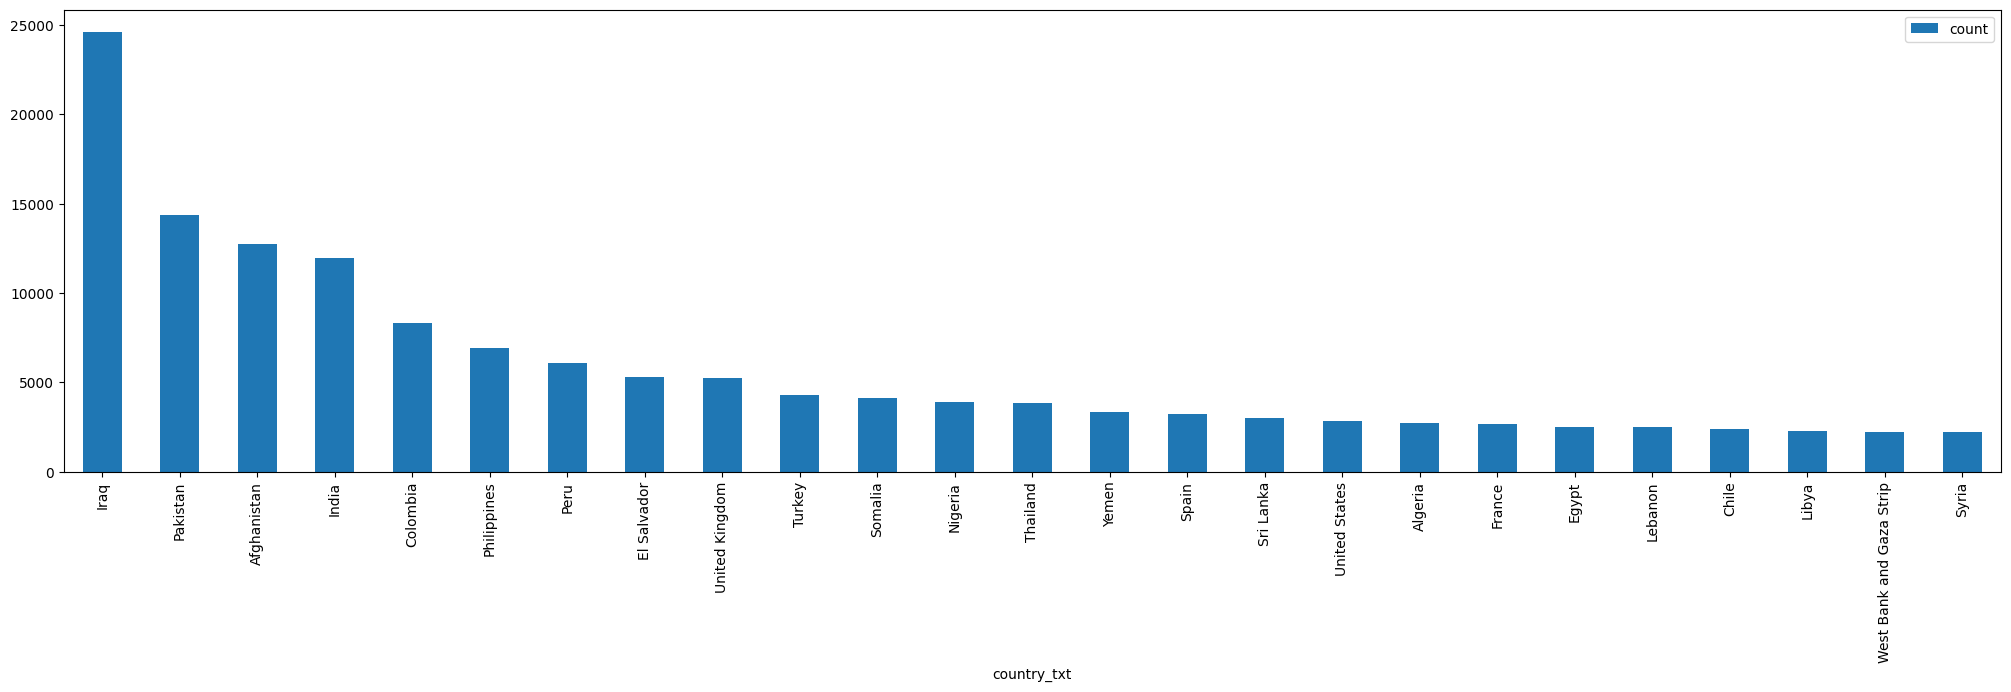

In [26]:
terrorist_count[:25].plot(kind = 'bar', x='country_txt', y = terrorist_count.columns.tolist()[1:], figsize=(25, 6))

In [29]:
spark.stop()